In [76]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import utils as np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
import matplotlib.pyplot as plt


def load_data():  # categorical_crossentropy
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    number = 10000
    x_train = x_train[0:number]
    y_train = y_train[0:number]
    # The image is 28 * 28 size
    # Original train has 60K samples
    # x_train = x_train.reshape(number, 28 * 28)
    # x_test = x_test.reshape(x_test.shape[0], 28 * 28)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    # convert class vectors to binary class matrices
    print(y_train.shape)
    y_train = np_utils.to_categorical(y_train, 10)
    print(y_train.shape)
    y_test = np_utils.to_categorical(y_test, 10)
    x_train = x_train
    x_test = x_test
    x_test = np.random.normal(x_test)  # 加噪声
    x_train = x_train / 255
    x_test = x_test / 255

    return (x_train, y_train), (x_test, y_test)

callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=10)]

In [77]:
# load training data and testing data
(x_train, y_train), (x_test, y_test) = load_data()

# define network structure
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(units=200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

# set configurations
model.compile(loss='categorical_crossentropy', 
optimizer='RMSprop', metrics=['accuracy'])
# train model
history = model.fit(x_train, y_train,
          batch_size=50, epochs=300, callbacks=callbacks, validation_split=0.05)

# evaluate the model and output the accuracy
result_train = model.evaluate(x_train, y_train);
result_test = model.evaluate(x_test, y_test);
print('Train Acc:', result_train[1])
print('Test Acc:', result_test[1])

(10000,)
(10000, 10)
Epoch 1/300
190/190 [==============================] - 1s 4ms/step - loss: 0.5403 - accuracy: 0.8343 - val_loss: 0.1857 - val_accuracy: 0.9460
Epoch 2/300
190/190 [==============================] - 1s 4ms/step - loss: 0.1774 - accuracy: 0.9478 - val_loss: 0.0966 - val_accuracy: 0.9720
Epoch 3/300
190/190 [==============================] - 1s 4ms/step - loss: 0.1178 - accuracy: 0.9645 - val_loss: 0.0689 - val_accuracy: 0.9820
Epoch 4/300
190/190 [==============================] - 1s 4ms/step - loss: 0.0873 - accuracy: 0.9744 - val_loss: 0.0478 - val_accuracy: 0.9860
Epoch 5/300
190/190 [==============================] - 1s 4ms/step - loss: 0.0718 - accuracy: 0.9787 - val_loss: 0.0481 - val_accuracy: 0.9880
Epoch 6/300
190/190 [==============================] - 1s 4ms/step - loss: 0.0572 - accuracy: 0.9833 - val_loss: 0.0479 - val_accuracy: 0.9840
Epoch 7/300
190/190 [==============================] - 1s 4ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.0353 -

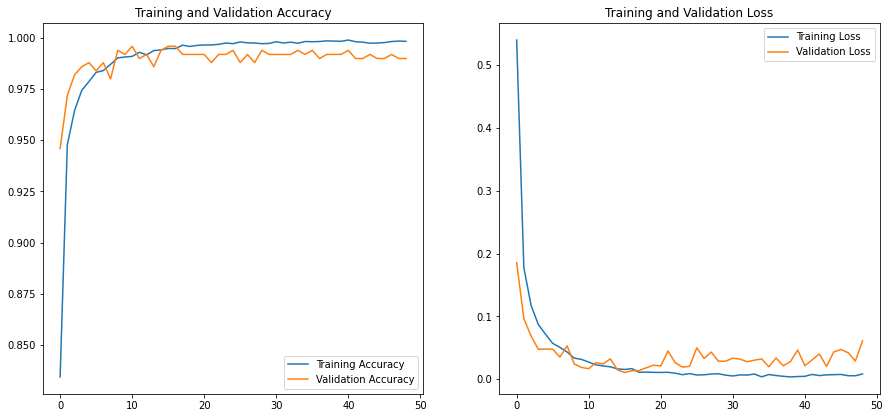

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.epoch))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [79]:
pred_labels = np.argmax(model.predict(x_test),axis=1)
actual_labels = np.argmax(y_test,axis=1)
(pred_labels == actual_labels).mean()

0.985

In [80]:
wrong_index = np.where((pred_labels == actual_labels) == False)
images = x_test[wrong_index]
wrong_pred_labels = pred_labels[wrong_index]
wrong_actual_labels = actual_labels[wrong_index]

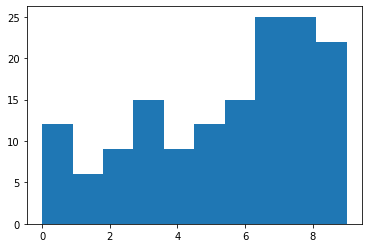

In [81]:
plt.hist(wrong_actual_labels)
plt.show()

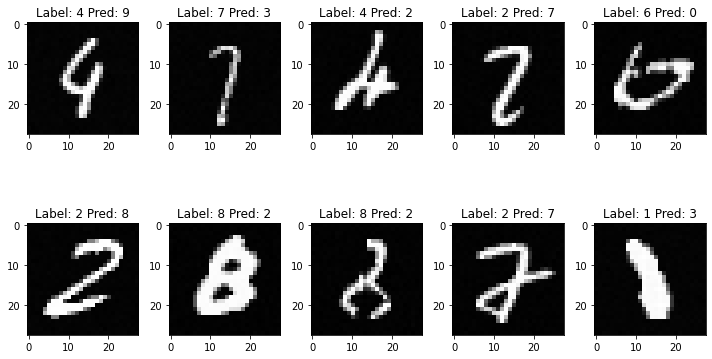

In [73]:
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = np.random.normal(x_test)
x_test = x_test / 255


num=10

images = x_test[wrong_index][:num]
preds = wrong_pred_labels[:num]
actuals = wrong_actual_labels[:num]

num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,3*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Label: {actuals[i]} Pred: {preds[i]}')
plt.tight_layout()
plt.show()